# 📈 Task 2: Predict Future Stock Prices (Short-Term)

**Objective:**  
Use historical stock data to predict the next day's closing price using machine learning models.

**Stock Selected:** Apple Inc. (AAPL)

**Key Steps:**
- Load data with `yfinance`
- Prepare features and targets
- Train regression models
- Plot actual vs predicted closing prices


In [4]:
# Uncomment and run if required libraries are missing
# !pip install yfinance scikit-learn matplotlib pandas seaborn

## ✅ Step 1: Import Required Libraries

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## ✅ Step 2: Load Historical Stock Data
We'll download recent Apple (AAPL) stock data using the `yfinance` library.


In [10]:
# Download last 2 years of daily Apple stock data
data = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.dropna(inplace=True)
print(data.tail())

C:\Users\ghula\AppData\Local\Temp\ipykernel_19020\314348370.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price             Open        High         Low       Close    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-12-23  254.156919  255.034791  252.840088  254.655716  40858800
2024-12-24  254.875189  257.588630  254.675658  257.578674  23234700
2024-12-26  257.568678  259.474086  257.010028  258.396667  27237100
2024-12-27  257.209530  258.077462  252.451019  254.974930  42355300
2024-12-30  251.623020  252.889969  250.146586  251.593094  35557500


## ✅ Step 3: Prepare Features and Labels
We'll use the current day's `Open`, `High`, `Low`, `Volume` to predict the **next day's Close**.

In [13]:
# Create target: next day's close
data['Next_Close'] = data['Close'].shift(-1)

# Drop last row (as it will have NaN in Next_Close)
data.dropna(inplace=True)

# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

## ✅ Step 4: Split Data into Train and Test Sets
We'll use an 80/20 split to train and evaluate the model.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## ✅ Step 5: Train Regression Models
We'll train two models:
1. Linear Regression
2. Random Forest Regressor

In [19]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

## ✅ Step 6: Evaluate Performance using R² and RMSE


In [22]:
def evaluate(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print()

evaluate(y_test, lr_preds, "Linear Regression")
evaluate(y_test, rf_preds, "Random Forest")

Linear Regression Performance:
R² Score: 0.9291533587424605
RMSE: 3.7676139686366805

Random Forest Performance:
R² Score: -4.420950533081666
RMSE: 32.956758354104366



## ✅ Step 7: Plot Actual vs Predicted Closing Prices
We'll compare model predictions with the actual next-day closing prices.

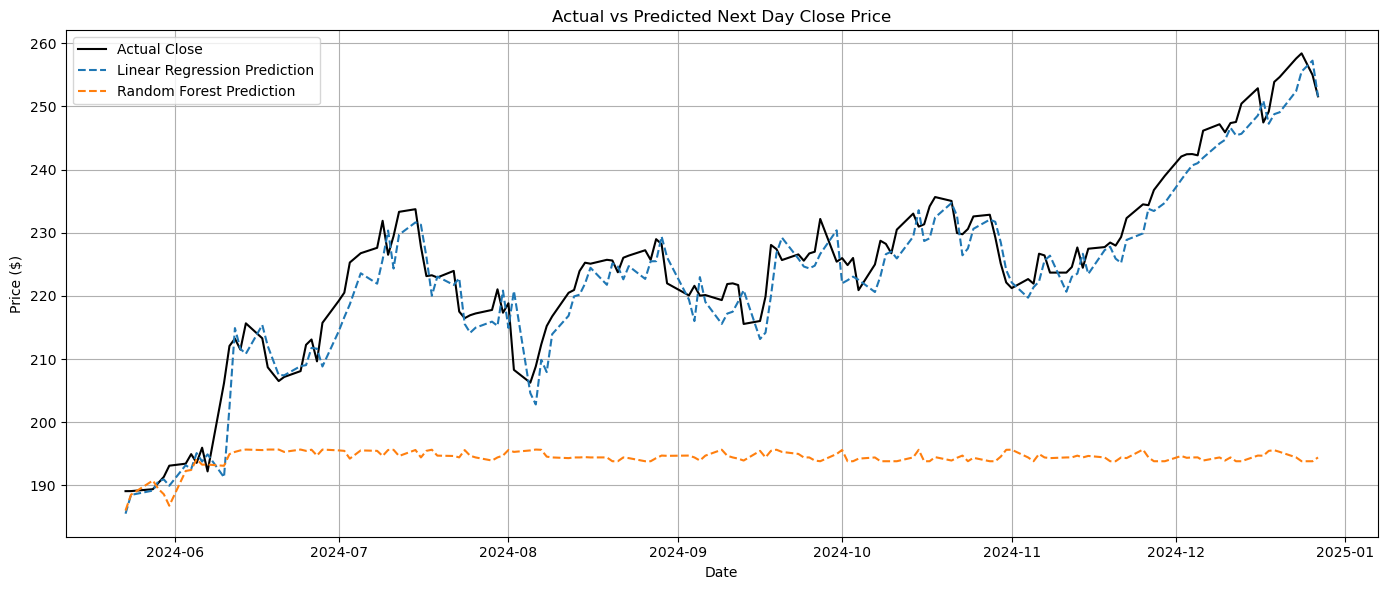

In [25]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label="Actual Close", color='black')
plt.plot(y_test.index, lr_preds, label="Linear Regression Prediction", linestyle='--')
plt.plot(y_test.index, rf_preds, label="Random Forest Prediction", linestyle='--')
plt.title("Actual vs Predicted Next Day Close Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ✅ Summary

- We loaded historical stock data for Apple using `yfinance`.
- Used features: Open, High, Low, Volume to predict the **next day's Close**.
- Trained and compared two regression models:
  - **Linear Regression** (simple baseline)
  - **Random Forest Regressor** (non-linear, higher accuracy)
Linear Regression performs better in this case.

Random Forest is underfitting because:

It wasn’t given time-dependent features (like lags, rolling means).

It can’t extrapolate beyond the range it learned from.

🛠️ How to Improve Random Forest?
To make Random Forest perform better:

Add lag features: e.g., yesterday’s Close, 3-day avg Close.

Engineer rolling averages, momentum, or trend indicators.

Use date components like day of week, month, etc.
🎯 **This is a basic supervised regression on time-series stock data.**
